In [1]:
import numpy as np
from scipy import optimize
from scipy.optimize import curve_fit
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from pylab import figure, plot, xlabel, grid, legend, title, savefig
from scipy.interpolate import interp1d

In [2]:
def cirlce_DC_Coil(x, A, B, C):#change this to function you want
    y = B - ( C**2 - (x-A)**2 )**0.5
    return y

In [3]:
Cylin='/mnt/c/Users/Christopher Crawford/Desktop/OneFace.txt'

In [4]:
pc=pd.read_csv(Cylin,delim_whitespace=True)
T_Cy1 = pd.DataFrame(pc)
T_Cy=T_Cy1.dropna()
T_Cy=T_Cy.reset_index(drop=True)
ContourLevel=T_Cy['IsoLevel'].unique()
tot=len(ContourLevel)

In [5]:
T_Cy["x"]=T_Cy["x"]*100
T_Cy["y"]=T_Cy["y"]*100
T_Cy["z"]=T_Cy["z"]*100

#T_Cy=T_Cy.round(6)
T_Cy.duplicated().any()
T_Cy

,x,y,z,IsoLevel
0,3.979255,-0.493283,0,-1050.422727
1,3.976578,-0.503798,0,-1050.422727
2,3.979402,-0.492701,0,-1050.422727
3,3.960309,-0.563205,0,-1050.422727
4,3.960260,-0.563376,0,-1050.422727
...,...,...,...,...
57236,-3.963107,0.553484,0,1050.422714
57237,-3.965905,0.543572,0,1050.422714
57238,-3.968654,0.533636,0,1050.422714
57239,-3.971354,0.523678,0,1050.422714


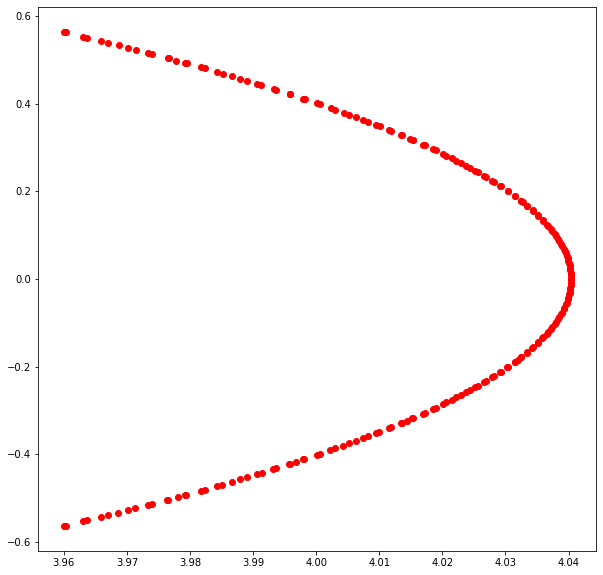

In [6]:
#plot the selected data
df = T_Cy.loc[(T_Cy['IsoLevel']==-1050.4227274310444)]
figure(1, figsize=(10, 10))
#plt.xlim(3.5,4.5)
plt.scatter(df["x"],df["y"], color='r')

In [7]:
#define required function to fit a circle
def calc_R(xc, yc):
    """ calculate the distance of each 2D points from the center (xc, yc) """
    return np.sqrt((x-xc)**2 + (y-yc)**2)

def f_2(c):
    """ calculate the algebraic distance between the data points and the mean circle centered at c=(xc, yc) """
    Ri = calc_R(*c)
    return Ri - Ri.mean()

In [25]:
X_1=[]
X_2=[]
R =[]
N=[]
for i in range (0, tot):
    method_2 = "leastsq"
    df = T_Cy.loc[(T_Cy['IsoLevel']==ContourLevel[i])]
    #print(ContourLevel[i])
    x=df['x']
    y=df['y']
    x_m=np.mean(df['x'])
    y_m=np.mean(df['y'])



    center_estimate = x_m, y_m
    center_2, ier = optimize.leastsq(f_2, center_estimate)

    xc_2, yc_2 = center_2
    Ri_2       = calc_R(*center_2)
    R_2        = Ri_2.mean()
    residu_2   = sum((Ri_2 - R_2)**2)
    #print("For : {} the radius of the circle is {},and center is ({},{})".format(i+1,R_2,xc_2,yc_2))
    X_1.append(xc_2)
    X_2.append(yc_2)
    R.append(R_2)
    N.append(i)

(0.0, 50.0)

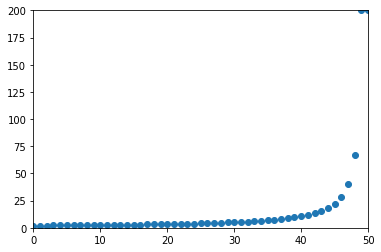

In [40]:
plt.plot(R,'o');
plt.ylim(0,200)
plt.xlim(0,50)

In [9]:
print("The radius of the circle fitted is {} with center ({},{})".format(R_2,xc_2,yc_2))

The radius of the circle fitted is 2.020184548214481 with center (-2.0202220146379855,3.8793749991647054e-07)


In [17]:
#plt.plot(df['x'], df['y'], 'o', label='data')
#plt.plot(df['x'], cirlce_DC_Coil(df['x'],xc_2,yc_2,R_2), '-', label='fit_Total',lw=3)
#plt.legend()
#plot is half because the function "cirlce_DC_Coil" is defined one sided